In [1]:
import protocols 
from matplotlib import pyplot as plt
from setting import Setting

setting = Setting(host_num=3, total_time=100, packet_num=4, max_collision_wait_time=20, p_resend=0.3, packet_size=3, link_delay=1, seed=11162049)
print('aloha')
result = protocols.aloha(setting, True)
print('success_rate:', result[0])
print('idle_rate:', result[1])
print('collision_rate:', result[2])

print('slotted_aloha')
result = protocols.slotted_aloha(setting, True)
print('success_rate:', result[0])
print('idle_rate:', result[1])
print('collision_rate:', result[2])

print('csma')
result = protocols.csma(setting, 0, True)
print('success_rate:', result[0])
print('idle_rate:', result[1])
print('collision_rate:', result[2])

print('csma_cd')
result = protocols.csma_cd(setting, 0, True)
print('success_rate:', result[0])
print('idle_rate:', result[1])
print('collision_rate:', result[2])

aloha
          V                V                          V                                      V          
h0: ......<---|...............<---|...<---|...............<---|.............<---><---|.............<---|
                           V       V                               V             V                      
h1: .......................<---|.....<---|.......<---><---|.<---|.................<---|.............<---
           V                                                                          V    V      V     
h2: .......<---|<--->.................................................................<---|...........<-
success_rate: 0.15
idle_rate: 0.39
collision_rate: 0.46
slotted_aloha
          V                V                          V                                      V          
h0: ......<---|.........<---|...............<---|....................<---|<---><---><--->....<---|......
                           V       V                               V             V  

In [2]:
# Q2
success_rate_list = [[],[],[],[]] # order: aloha, slotted_aloha, csma, csma_cd
idle_rate_list = [[],[],[],[]]
collision_rate_list = [[],[],[],[]]
packet_size_list = [1200,800,600,400]
host_num_list = [2,3,4,6]
n = 10
for h, p in zip(host_num_list, packet_size_list):
    success_rate = [0,0,0,0]
    idle_rate = [0,0,0,0]
    collision_rate = [0,0,0,0]
    for s in range(n):
        problem = Setting(host_num=h, packet_num=p, coefficient=1)
        # aloha
        result = protocols.aloha(problem)
        success_rate[0] += result[0]
        idle_rate[0] += result[1]
        collision_rate[0] += result[2]
        # slotted_aloha
        result = protocols.slotted_aloha(problem)
        success_rate[1] += result[0]
        idle_rate[1] += result[1]
        collision_rate[1] += result[2]
        # csma
        result = protocols.csma(problem)
        success_rate[2] += result[0]
        idle_rate[2] += result[1]
        collision_rate[2] += result[2]
        # csma_cd
        result = protocols.csma_cd(problem)
        success_rate[3] += result[0]
        idle_rate[3] += result[1]
        collision_rate[3] += result[2]
    
    for i in range(4):
        success_rate_list[i].append(success_rate[i]/n)
        idle_rate_list[i].append(idle_rate[i]/n)
        collision_rate_list[i].append(collision_rate[i]/n)

In [3]:
def pltt(tar_list, xname):
    plt.plot(tar_list, success_rate_list[0], marker='x', label='aloha', color='#000000')
    plt.plot(tar_list, success_rate_list[1], marker='s', label='slotted aloha', color='#ff0000')
    plt.plot(tar_list, success_rate_list[2], marker='^', label='csma', color='#00ff00')
    plt.plot(tar_list, success_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
    plt.xlabel(xname)
    plt.ylabel('Success Rate')
    plt.xticks(tar_list)
    plt.title('Influence of ' + xname)
    plt.legend()
    plt.show()

    plt.plot(tar_list, idle_rate_list[0], marker='x', label='aloha', color='#000000')
    plt.plot(tar_list, idle_rate_list[1], marker='s', label='slotted aloha', color='#ff0000')
    plt.plot(tar_list, idle_rate_list[2], marker='^', label='csma', color='#00ff00')
    plt.plot(tar_list, idle_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
    plt.xlabel('Packet Size')
    plt.ylabel('Idle Rate')
    plt.xticks(tar_list)
    plt.title('Influence of ' + xname)
    plt.legend()
    plt.show()

    plt.plot(tar_list, collision_rate_list[0], marker='x', label='aloha', color='#000000')
    plt.plot(tar_list, collision_rate_list[1], marker='s', label='slotted aloha', color='#ff0000')
    plt.plot(tar_list, collision_rate_list[2], marker='^', label='csma', color='#00ff00')
    plt.plot(tar_list, collision_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
    plt.xlabel('Packet Size')
    plt.ylabel('Collision Rate')
    plt.xticks(tar_list)
    plt.title('Influence of ' + xname)
    plt.legend()
    plt.show()

In [15]:
# Coeff

success_rate_list = [[],[],[],[]] # order: aloha, slotted_aloha, csma, csma_cd
idle_rate_list = [[],[],[],[]]
collision_rate_list = [[],[],[],[]]
coeff_list = [i for i in range(1, 31, 1)]
n = 10
for coeff in coeff_list:
    success_rate = [0,0,0,0]
    idle_rate = [0,0,0,0]
    collision_rate = [0,0,0,0]
    
    for s in range(n):
        problem = Setting( coefficient=coeff )
        # aloha
        result = protocols.aloha(problem)
        success_rate[0] += result[0]
        idle_rate[0] += result[1]
        collision_rate[0] += result[2]
        # slotted_aloha
        result = protocols.slotted_aloha(problem)
        success_rate[1] += result[0]
        idle_rate[1] += result[1]
        collision_rate[1] += result[2]
        # csma
        result = protocols.csma(problem)
        success_rate[2] += result[0]
        idle_rate[2] += result[1]
        collision_rate[2] += result[2]
        # csma_cd
        result = protocols.csma_cd(problem)
        success_rate[3] += result[0]
        idle_rate[3] += result[1]
        collision_rate[3] += result[2]

    for i in range(4):
            success_rate_list[i].append(success_rate[i]/n)
            idle_rate_list[i].append(idle_rate[i]/n)
            collision_rate_list[i].append(collision_rate[i]/n)


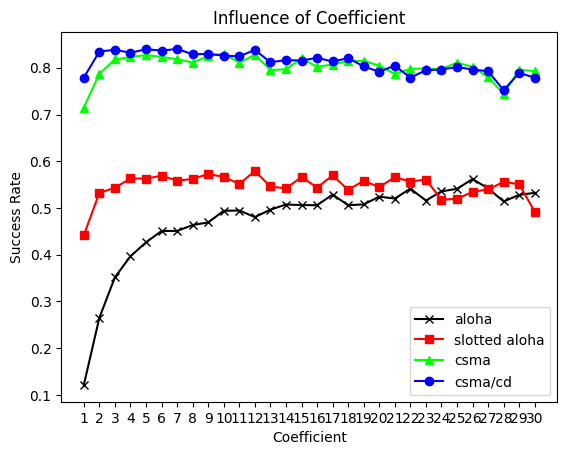

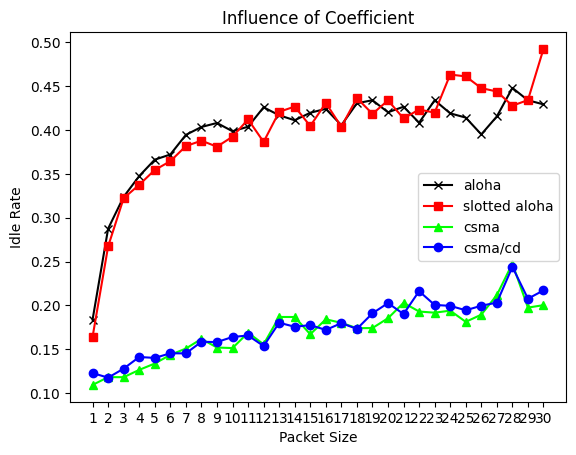

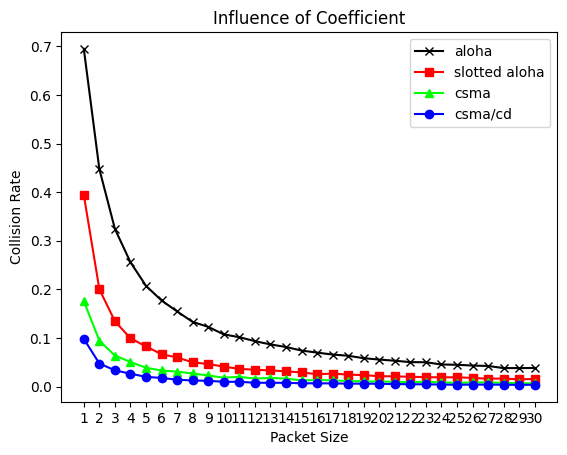

In [16]:
pltt(coeff_list, "Coefficient")

In [6]:
# Packet num

success_rate_list = [[],[],[],[]] # order: aloha, slotted_aloha, csma, csma_cd
idle_rate_list = [[],[],[],[]]
collision_rate_list = [[],[],[],[]]
packet_num_list = [i for i in range(100, 1050, 50)]
n = 10
for p in packet_num_list:
    success_rate = [0,0,0,0]
    idle_rate = [0,0,0,0]
    collision_rate = [0,0,0,0]
    
    for s in range(n):
        problem = Setting( packet_num =  p)
        # aloha
        result = protocols.aloha(problem)
        success_rate[0] += result[0]
        idle_rate[0] += result[1]
        collision_rate[0] += result[2]
        # slotted_aloha
        result = protocols.slotted_aloha(problem)
        success_rate[1] += result[0]
        idle_rate[1] += result[1]
        collision_rate[1] += result[2]
        # csma
        result = protocols.csma(problem)
        success_rate[2] += result[0]
        idle_rate[2] += result[1]
        collision_rate[2] += result[2]
        # csma_cd
        result = protocols.csma_cd(problem)
        success_rate[3] += result[0]
        idle_rate[3] += result[1]
        collision_rate[3] += result[2]

    for i in range(4):
            success_rate_list[i].append(success_rate[i]/n)
            idle_rate_list[i].append(idle_rate[i]/n)
            collision_rate_list[i].append(collision_rate[i]/n)


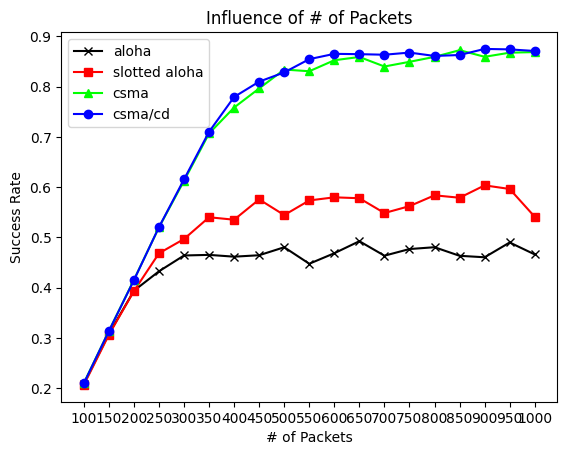

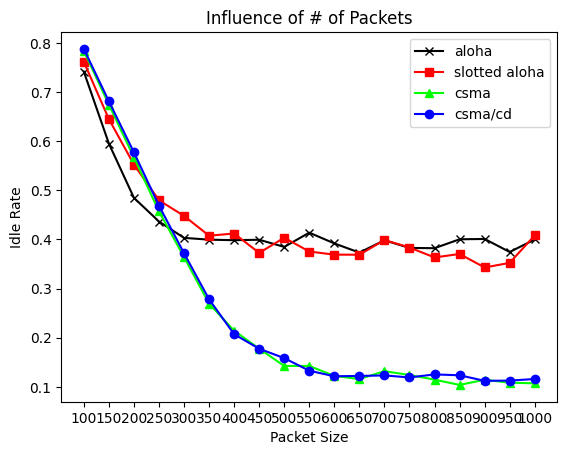

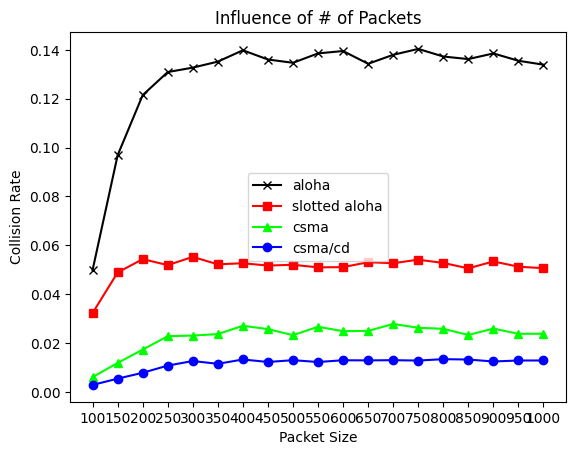

In [7]:
pltt(packet_num_list, "# of Packets")

In [8]:
# Host num

success_rate_list = [[],[],[],[]] # order: aloha, slotted_aloha, csma, csma_cd
idle_rate_list = [[],[],[],[]]
collision_rate_list = [[],[],[],[]]
host_num_list = [i for i in range(1, 11, 1)]
n = 10
for h in host_num_list:
    success_rate = [0,0,0,0]
    idle_rate = [0,0,0,0]
    collision_rate = [0,0,0,0]
    
    for s in range(n):
        problem = Setting( host_num =  h)
        # aloha
        result = protocols.aloha(problem)
        success_rate[0] += result[0]
        idle_rate[0] += result[1]
        collision_rate[0] += result[2]
        # slotted_aloha
        result = protocols.slotted_aloha(problem)
        success_rate[1] += result[0]
        idle_rate[1] += result[1]
        collision_rate[1] += result[2]
        # csma
        result = protocols.csma(problem)
        success_rate[2] += result[0]
        idle_rate[2] += result[1]
        collision_rate[2] += result[2]
        # csma_cd
        result = protocols.csma_cd(problem)
        success_rate[3] += result[0]
        idle_rate[3] += result[1]
        collision_rate[3] += result[2]

    for i in range(4):
            success_rate_list[i].append(success_rate[i]/n)
            idle_rate_list[i].append(idle_rate[i]/n)
            collision_rate_list[i].append(collision_rate[i]/n)


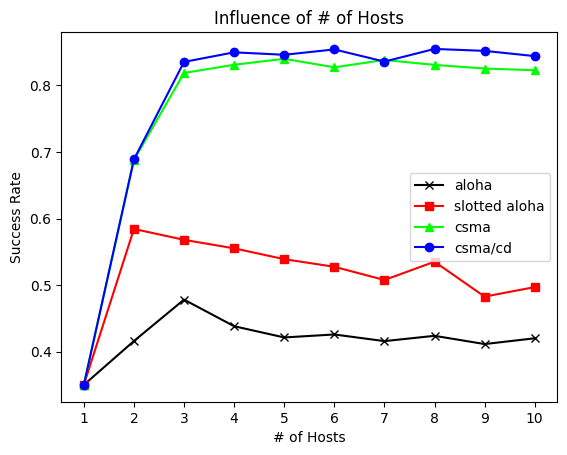

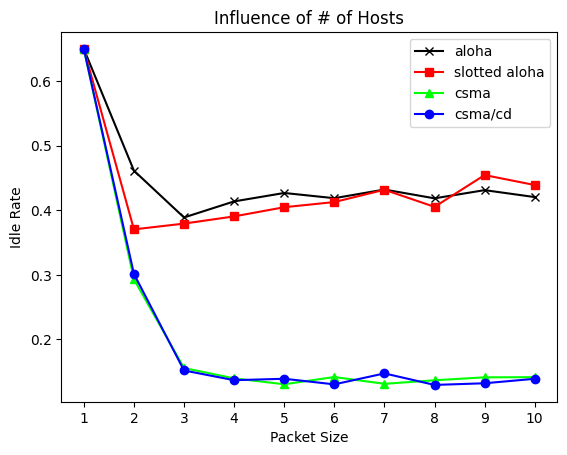

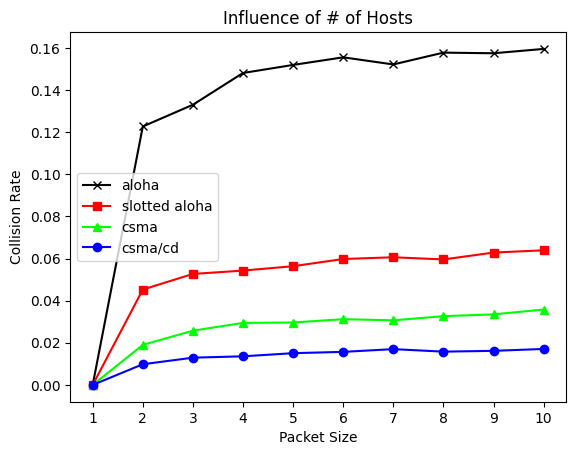

In [9]:
pltt(host_num_list, "# of Hosts")

In [10]:
# Packet Size

success_rate_list = [[],[],[],[]] # order: aloha, slotted_aloha, csma, csma_cd
idle_rate_list = [[],[],[],[]]
collision_rate_list = [[],[],[],[]]
packet_size_list = [i for i in range(1, 21, 1)]
n = 10
for sz in packet_size_list:
    success_rate = [0,0,0,0]
    idle_rate = [0,0,0,0]
    collision_rate = [0,0,0,0]
    
    for s in range(n):
        problem = Setting( packet_size=sz )
        # aloha
        result = protocols.aloha(problem)
        success_rate[0] += result[0]
        idle_rate[0] += result[1]
        collision_rate[0] += result[2]
        # slotted_aloha
        result = protocols.slotted_aloha(problem)
        success_rate[1] += result[0]
        idle_rate[1] += result[1]
        collision_rate[1] += result[2]
        # csma
        result = protocols.csma(problem)
        success_rate[2] += result[0]
        idle_rate[2] += result[1]
        collision_rate[2] += result[2]
        # csma_cd
        result = protocols.csma_cd(problem)
        success_rate[3] += result[0]
        idle_rate[3] += result[1]
        collision_rate[3] += result[2]

    for i in range(4):
            success_rate_list[i].append(success_rate[i]/n)
            idle_rate_list[i].append(idle_rate[i]/n)
            collision_rate_list[i].append(collision_rate[i]/n)


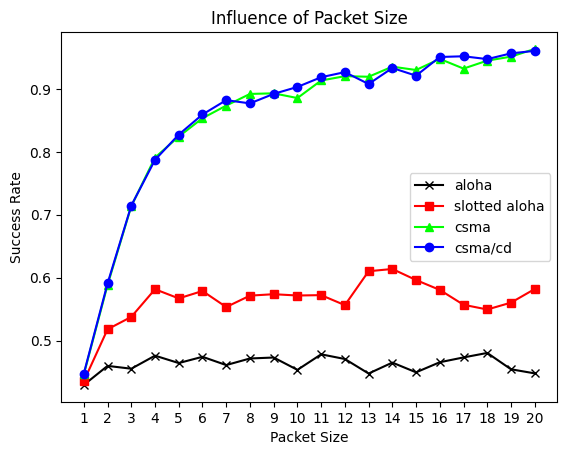

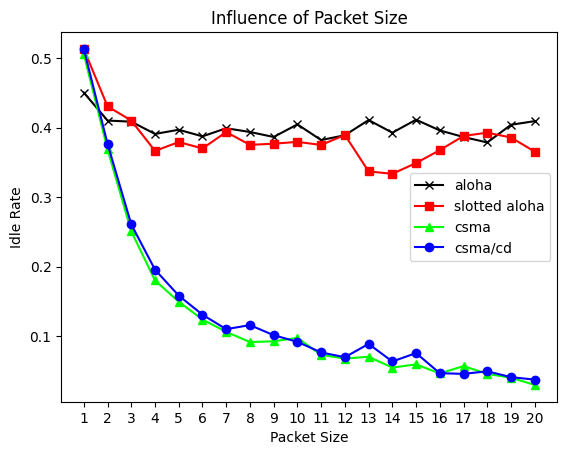

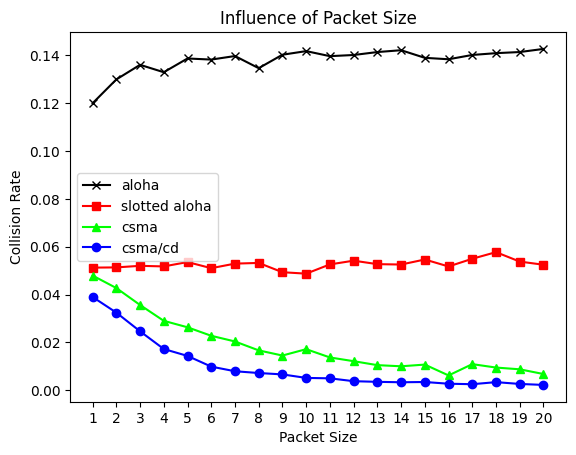

In [11]:
pltt(packet_size_list, "Packet Size")

In [17]:
# Link Delay

success_rate_list = [[],[]] # order: csma, csma_cd
idle_rate_list = [[],[]]
collision_rate_list = [[],[]]
link_delay_list = [0, 1, 2, 3]
packet_size_list = [7, 5, 3, 1]

setting.packet_time = 4  # constant
n = 10
for l, p in zip(link_delay_list, packet_size_list):
    success_rate = [0,0]
    idle_rate = [0,0]
    collision_rate = [0,0]
    
    for s in range(n):
        problem = Setting( link_delay = l, packet_size = p)
        # csma
        result = protocols.csma(problem)
        success_rate[0] += result[0]
        idle_rate[0] += result[1]
        collision_rate[0] += result[2]
        # csma_cd
        result = protocols.csma_cd(problem)
        success_rate[1] += result[0]
        idle_rate[1] += result[1]
        collision_rate[1] += result[2]

    for i in range(2):
            success_rate_list[i].append(success_rate[i]/n)
            idle_rate_list[i].append(idle_rate[i]/n)
            collision_rate_list[i].append(collision_rate[i]/n)


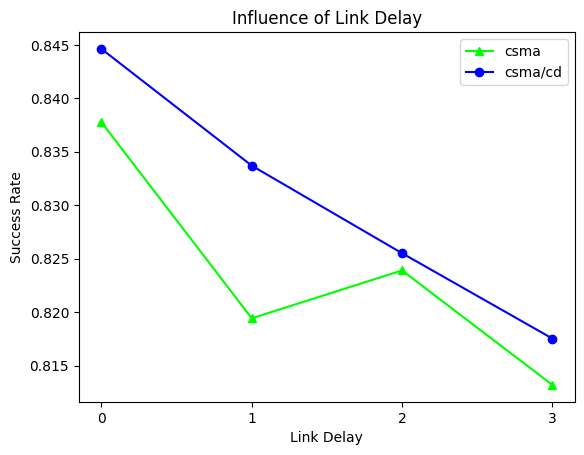

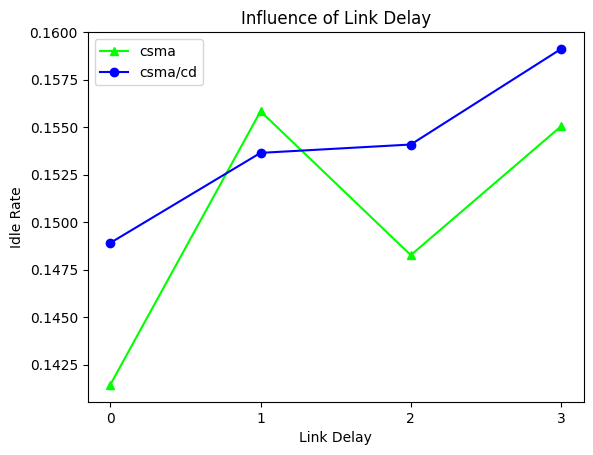

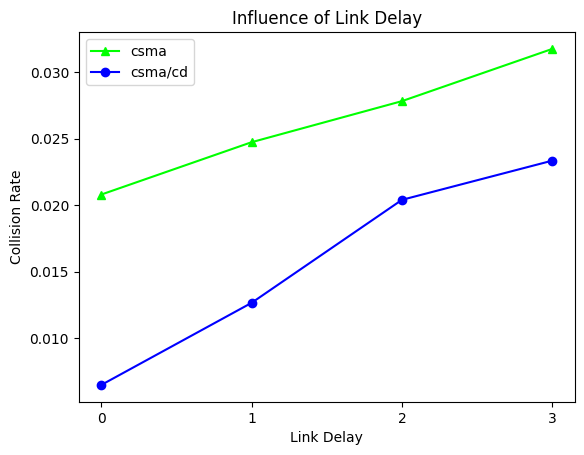

In [18]:
plt.plot(link_delay_list, success_rate_list[0], marker='^', label='csma', color='#00ff00')
plt.plot(link_delay_list, success_rate_list[1], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Link Delay')
plt.ylabel('Success Rate')
plt.xticks(link_delay_list)
plt.title('Influence of Link Delay')
plt.legend()
plt.show()

plt.plot(link_delay_list, idle_rate_list[0], marker='^', label='csma', color='#00ff00')
plt.plot(link_delay_list, idle_rate_list[1], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Link Delay')
plt.ylabel('Idle Rate')
plt.xticks(link_delay_list)
plt.title('Influence of Link Delay')
plt.legend()
plt.show()


plt.plot(link_delay_list, collision_rate_list[0], marker='^', label='csma', color='#00ff00')
plt.plot(link_delay_list, collision_rate_list[1], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Link Delay')
plt.ylabel('Collision Rate')
plt.xticks(link_delay_list)
plt.title('Influence of Link Delay')
plt.legend()
plt.show()